In [53]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

#plotly or other graphing library
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [54]:
csv_path = 'https://raw.githubusercontent.com/uzmabb182/Data602_Assignments/main/Final_Project_Data_602/resources/tableau_modality_df.csv'
modality_df = pd.read_csv(csv_path, encoding="utf-8")
modality_df

,learning_modality,year,student_count,state,population,abbreviation,student_count_per_10k
0,Hybrid,2021,8033,Alaska,736990,AK,108.997408
1,Hybrid,2021,5863,Alabama,4893186,AL,11.981968
2,Hybrid,2021,1354,Arkansas,3011873,AR,4.495541
3,Hybrid,2021,735,Arizona,7174064,AZ,1.024524
4,Hybrid,2021,3320,California,39346023,CA,0.843796
...,...,...,...,...,...,...,...
262,Remote,2022,2135,South Dakota,879336,SD,24.279684
263,Remote,2022,12263,Texas,28635442,TX,4.282455
264,Remote,2022,660,Utah,3151239,UT,2.094414
265,Remote,2022,232,Washington,7512465,WA,0.308820


In [55]:
modality_df['learning_modality'].unique()

array(['Hybrid', 'In Person', 'Remote'], dtype=object)

In [56]:
modality_df.dtypes

learning_modality         object
year                       int64
student_count              int64
state                     object
population                 int64
abbreviation              object
student_count_per_10k    float64
dtype: object

In [57]:
modality_df.loc[modality_df['abbreviation'] == 'NM']

,learning_modality,year,student_count,state,population,abbreviation,student_count_per_10k
30,Hybrid,2021,1341,New Mexico,2097021,NM,6.394786
78,Hybrid,2022,11329,New Mexico,2097021,NM,54.024256
127,In Person,2021,2961,New Mexico,2097021,NM,14.120030
177,In Person,2022,2684,New Mexico,2097021,NM,12.799109
216,Remote,2021,760,New Mexico,2097021,NM,3.624189
255,Remote,2022,276,New Mexico,2097021,NM,1.316153


In [58]:
# Remove column name 'abbreviation'
modality_df = modality_df.drop(['abbreviation'], axis=1)
modality_df

,learning_modality,year,student_count,state,population,student_count_per_10k
0,Hybrid,2021,8033,Alaska,736990,108.997408
1,Hybrid,2021,5863,Alabama,4893186,11.981968
2,Hybrid,2021,1354,Arkansas,3011873,4.495541
3,Hybrid,2021,735,Arizona,7174064,1.024524
4,Hybrid,2021,3320,California,39346023,0.843796
...,...,...,...,...,...,...
262,Remote,2022,2135,South Dakota,879336,24.279684
263,Remote,2022,12263,Texas,28635442,4.282455
264,Remote,2022,660,Utah,3151239,2.094414
265,Remote,2022,232,Washington,7512465,0.308820


In [59]:
# Checking the missing data
modality_df.isna().sum().sort_values()

learning_modality        0
year                     0
student_count            0
state                    0
population               0
student_count_per_10k    0
dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
le_learning_modality = LabelEncoder()
modality_df['learning_modality'] = le_learning_modality.fit_transform(modality_df['learning_modality'])
modality_df['learning_modality'].unique()

array([0, 1, 2])

In [61]:

le_learning_modality = LabelEncoder()
modality_df['state'] = le_learning_modality.fit_transform(modality_df['state'])
modality_df['state'].unique()

array([ 1,  0,  3,  2,  4,  5,  6,  8,  7,  9, 10, 14, 11, 12, 13, 15, 16,
       17, 20, 19, 18, 21, 22, 24, 23, 25, 32, 26, 28, 29, 30, 27, 31, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 44, 46, 48, 47, 33, 49])

In [62]:
# Scaling in scikit-learn
from sklearn.preprocessing import StandardScaler

X = modality_df.drop('learning_modality', axis=1).values
y = modality_df['learning_modality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

1363490.8221557988 4280229.36741213
-8.936826239912247e-15 0.9999999999999996


In [63]:
print(X.shape, y.shape)



(267, 5) (267,)


In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)


In [65]:
# Scaling in a pipeline
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(y_pred)
print(knn_scaled.score(X_test, y_test))


[0 1 0 0 2 0 1 1 1 0 0 1 0 0 1 2 0 0 0 2 2 0 1 0 0 1 1 0 0 2 0 1 0 2 1 1 0
 1 0 1 2 0 0 1 0 0 0 0 0 2 2 1 1 2]
0.2777777777777778


In [66]:
# Comparing the performance using the unscaled data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

0.2037037037037037


In [67]:
# Cross Validation and Scaling in a Pipeline

from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)
print(y_pred)

[1 1 2 1 0 1 1 1 1 0 1 1 0 0 2 1 1 2 0 2 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 2
 1 1 0 2 0 0 1 2 1 0 0 1 2 1 1 1 1]


In [68]:
# Checking Model Parameters
# value for K
print(cv.best_score_)
print(cv.best_params_)

0.35758582502768554
{'knn__n_neighbors': 21}


### Model Complexity Curve and over/underfitting
### To plot test accuracy and train accuracy Vs K value.

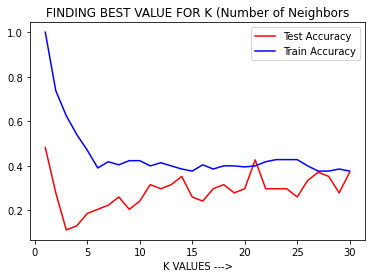

In [69]:
# To plot test accuracy and train accuracy Vs K value.
p = list(range(1, 31))
lst_test =[]
lst_train =[]
for i in p:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    z = knn.score(X_test, y_test)
    t = knn.score(X_train, y_train)
    lst_test.append(z)
    lst_train.append(t)
      
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('K VALUES --->')
plt.title('FINDING BEST VALUE FOR K (Number of Neighbors')
plt.legend()


### **Evaluating Classification Models**

In [70]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = modality_df.drop('learning_modality', axis=1).values
y = modality_df['learning_modality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


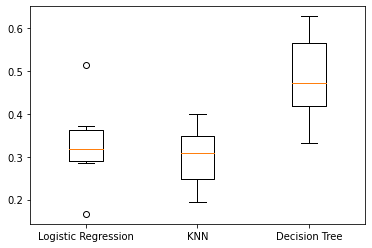

In [71]:
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), 
          "Decision Tree": DecisionTreeClassifier()}

results = []

for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

### **Test Set Performance**

In [73]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  test_score = model.score(X_test_scaled, y_test)
  print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.5
KNN Test Set Accuracy: 0.2037037037037037
Decision Tree Test Set Accuracy: 0.3888888888888889
